# Naive Bayes Classification
A groups of fast and simple classification algorithms suitable for very high dimensional datasets. 
- they have few tunable paramets
- good for baselining problems

## Bayesian Classification
- naive bayes classification built on bayesian classification methods
- relys on Baye's theorem
    - describes the relationship of conditional probabilities of statistical quantities
- we are interested in finding the probability of a label given some observed features
- we can decide on labels by computing the posterior probabilities of each label
- then we use a model to compute for each label
- this model is a generative model because it uses a hypothetical random process that generates data
- we make naive assumptions about the generative model for each label
- this allows us to make a rough approximation of the generative model for each class
- then we can proceed with the Bayesian classification`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes
- easiest to understand
- assumption: data from each label is drawn from a simple Gaussian distribution

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


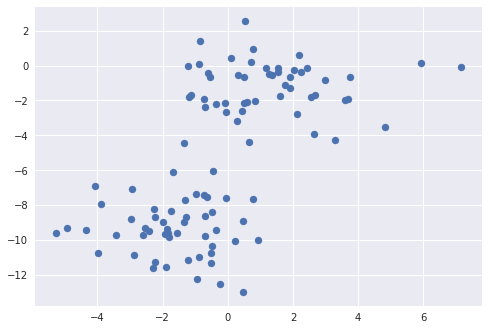

In [2]:
# consider this data
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='RdBu')

We can create a simple model by assuming the data is described by a Gaussian distribution with no covariance between dimensions.
- model can be fit by finding the mean and standard deviation of the points within each label

- the generative model creates ellises around data
- larger probabilities are towards the center of the ellispes

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None)

In [5]:
# generate some data and predict the label
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plot new data to get an idea of where the decision boundary is

(-5.8992664866054731,
 7.7862788381523007,
 -13.788951516177548,
 3.3764615206977902)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


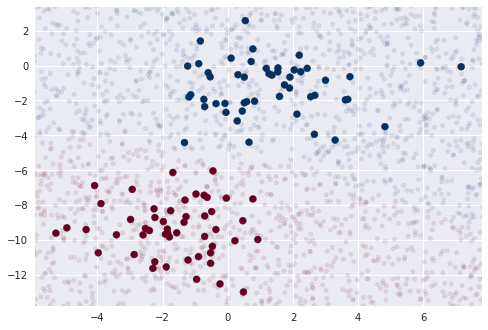

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In the above, we see a curved boundary
- in general, Gaussian Naive Bayes is quadratic

We can perform probabilistic classification

In [7]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])

The columns give probabilities of the data point being label 1 or label 2

## Multinomial Naive Bayes
We can also assume that:
    - features are generated from a simple multinomial distribution

This distribution describes the probability of observing counts amoung a number of categories
- most appropraite for features that represent counts or count rates

Instead of modeling the data with best-fit Gaussian, we will use best-fit multinomial distribution

## Example: Classifying Text
- often used for text classification
- features are related to word counts or frequencies within the documents

Lets use a sparse word count features from 20 Newsgroups corpus to show how we might classify these short documents into categories

In [8]:
# download the data and look at target names
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [20]:
# lets only select a few categories and download the training and test sets
# categories = ['talk.religion.misc', 'soc.religion.christian',
#               'sci.space', 'comp.graphics']

categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [21]:
# examine an entry
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

To use this data, we need to convert the content of each string into a vector of numbers.
- use the TF-IDF vectorizer
- create a pipeline that attaches it to a multinomial naive bayes classifier

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [23]:
# apply training data and predict labels with test data
model.fit(train.data, train.target)
labels = model.predict(test.data)

Evaluate predictions to leran about performance of the estimator
- use a confusion matrix

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


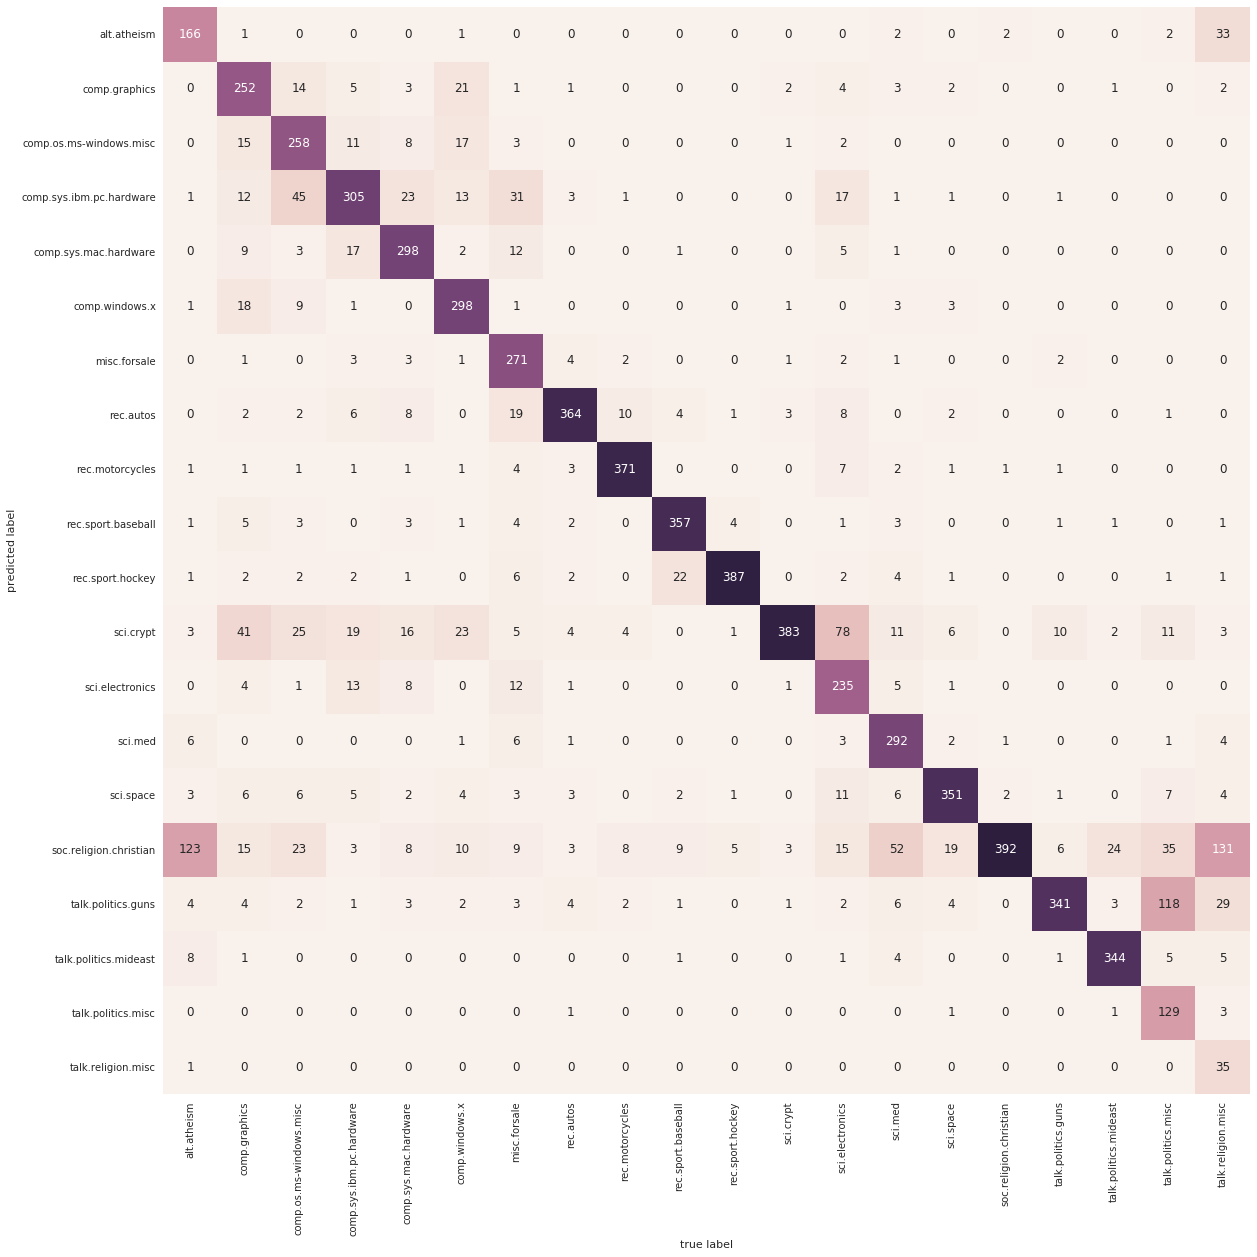

In [25]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20, 20))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

This simple classifier works well for some, but not between reglious talk

We can use this model to predict any string

In [26]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [27]:
predict_category('sending a payload to the ISS')

'sci.space'

In [28]:
predict_category('discussing islam vs atheism')

'alt.atheism'

In [29]:
predict_category('determining the screen resolution')

'comp.graphics'

## When to use Naive Bayes
- the assumptions makes for low performance with a more complicated model

Advantages:
- fast for training and prediction
- straightforward probabilitic prediction
- easily interpretable
- few tunable parameters

This makes it good for baseline classifications.

This tends to perform well for:
- naive assumptions match the data
- data categories are well seperated, when model complexity is less important
- high-dimensional data when model complexity is less important

We expect data points to seperate as it is better described. This means that when you have enough data, a simple model can be powerful. 